In [18]:
import numpy as np
from math import exp, pow, sqrt
from numpy.linalg import inv
from functools import reduce
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Interpolation with RBF

$$
f( x) =\sum ^{P}_{p=1} a_{p} .R_{p} +b
$$

$$
R_{p} = e^{-\frac{1}{2\sigma ^{2}} .\parallel ( X_{i}) -( X_{p}) \parallel ^{2}}
$$

$$
\sigma =\frac{P_{max} -P_{min}}{\sqrt{2P}}
$$

$$
\sigma =\frac{4-2}{\sqrt{2.2}} \ 
$$

$$
\sigma ^{2} =1
$$

$$
C_{1}=2
$$

$$
C_{2}=4
$$

$$\displaystyle \frac{1}{[ R]} =\left([ R]^{t} .[ R]\right)^{-1} .[ R]^{t}$$

$$
\displaystyle \begin{bmatrix}
a
\end{bmatrix} =\frac{1}{[ R]} \ \begin{bmatrix}
A
\end{bmatrix}
$$

In [19]:
def rbf(inp, out, center):
    def euclidean_norm(x1, x2):
        return sqrt(((x1 - x2)**2).sum(axis=0))
    
    def gaussian (x, c):
        return exp(-0.5 * pow(euclidean_norm(x, c), 2))
    
    R = np.ones((len(inp), (len(center) + 1)))

    for i, iv in enumerate(inp):
        for j, jv in enumerate(center):
            R[i, j] = (gaussian(inp[i], center[j]))
            
    Rt = R.transpose()
    RtR = Rt.dot(R)
    iRtR = inv(RtR)
    oneR = iRtR.dot(Rt)
    a = oneR.dot(out)
    
    def rbf_interpolation(x):
        sum = np.ones(len(center) + 1)

        for i, iv in enumerate(center):
            sum[i] = gaussian(x, iv)

        y = a * sum
        return reduce((lambda x, y: x + y), y)
        
    return rbf_interpolation

***

In [20]:
inp = np.array([2, 3, 4])
out = np.array([3, 6, 5])
center = np.array([2, 4])

rbf_instance = rbf(inp, out, center)

In [21]:
input_test = input_test = np.linspace(0,10,100)
output_test = list(map(rbf_instance, input_test))

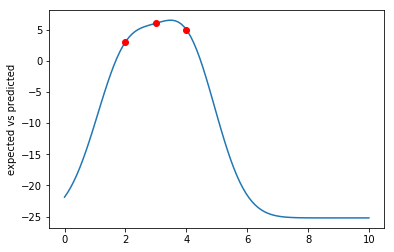

In [22]:
plt.plot(input_test, output_test)
plt.plot(inp, out, 'ro')
plt.ylabel('expected vs predicted')
plt.savefig("rbf1.svg")
plt.show()

***

In [23]:
inp = np.array([2, 3, 4, 5])
out = np.array([3, 1, 5, -2])
center = np.array([2, 3, 4])

rbf_instance = rbf(inp, out, center)

In [24]:
input_test = np.linspace(-5,10,100)
output_test = list(map(rbf_instance, input_test))

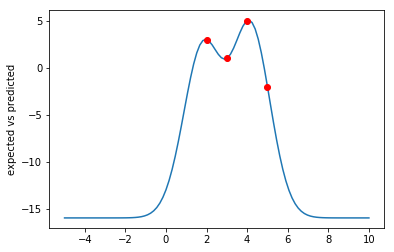

In [25]:
plt.plot(input_test, output_test)
plt.plot(inp, out, 'ro')
plt.ylabel('expected vs predicted')
plt.savefig("rbf2.svg")
plt.show()

***

In [26]:
inp = np.array([2, 4, 7, 9])
out = np.array([7, 8, 9, 5])
center = np.array([2, 3, 4])

rbf_instance = rbf(inp, out, center)

In [27]:
input_test = input_test = np.linspace(-5,15,100)
output_test = list(map(rbf_instance, input_test))

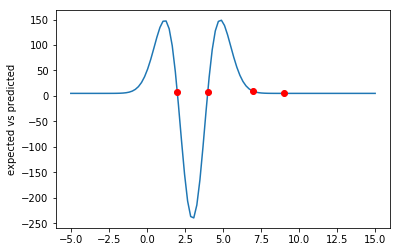

In [28]:
plt.plot(input_test, output_test)
plt.plot(inp, out, 'ro')
plt.ylabel('expected vs predicted')
plt.savefig("rbf3.svg")
plt.show()

***

### XOR input

In [29]:
inp = np.array([np.array([1,1]), np.array([0,1]), np.array([0,0]), np.array([1,0])])
out = np.array([              0,               1,               0,             1])
center = np.array([ np.array([1,1]), np.array([0,0])])

rbf_instance = rbf(inp, out, center)

In [30]:
inp_test = np.array([np.array([1,1]), 
                     np.array([0,1]), 
                     np.array([0,0]), 
                     np.array([1,0])])
output = map(rbf_instance, inp_test)

In [31]:
def colorize(output):
    c = [None]* len(output)
    for i, iv in enumerate(output):
        if (output[i] > 0):
            c[i] = 'blue'
        else:
            c[i] = 'red'
    return c

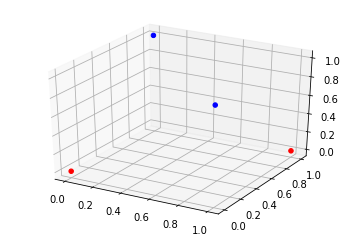

In [32]:
inp_x = [1, 0, 0, 1]
inp_y = [1, 1, 0, 0]

c = colorize(output)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inp_x, inp_y, output, color=c, depthshade=False)
plt.savefig("rbf_xor.svg")
plt.show()